<a id='0'></a>
# <p style="background-color:red; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Table of Content</p>
* [1.Introduction](#1)
* [2.Importing necessary modules and libraries📚](#2)
* [3.Data Exploration && Data Wrangling🔍](#3)
* [4.Data Vizualization🎨](#5)
* [5.Machine Learning model training📝](#6)
   * [5.1 Applying Regression Algorithms](#6.1)
   * [5.2 Applying Classification Algorithms](#6.2)

<a id='1'></a>
# <p style="background-color:violet; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 10px 25px;">Introduction</p>


The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories


This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.

### Feature Description:
* <b> date  </b> : Date in MM-DD-YYYY
* <b>quarter </b>: A portion of the month. A month was divided into four quarters
* <b>department </b>: Associated department with the instance
* <b>day </b>:Day of the Week
* <b>team </b>:Associated team number with the instance
* <b>targeted_productivity</b>:Targeted productivity set by the Authority for each team for each day.
* <b>smv </b> :Standard Minute Value, it is the allocated time for a task
* <b>wip </b>:Work in progress. Includes the number of unfinished items for products
* <b>over_time</b> :amount of overtime by each team in minutes
* <b>incentive </b> :amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* <b> Idle_time </b> : Idle time
* <b> idle_men </b>: Idle men
* <b>no_of_style_change</b> : no_of_style_change
* <b>no_of_workers</b> : no_of_workers
* <b>actual_productivity</b> : actual_productivity


<a id='2'></a>
# <p style="background-color:violet; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">2.Importing necessary modules and libraries📚</p>

In [1]:
# importing all necessary libraries
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# reading data
data=pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
# check shape of dataset
data.shape

(1197, 15)

In [5]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [6]:
data['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

<a id='3'></a>
# <p style="background-color:violet; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">3.Data Exploration && Data Wrangling📚</p>

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
# let's check null values
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
data.describe(include=['O'])

,quarter,department,day
count,1197,1197,1197
unique,5,3,6
top,Quarter1,sweing,Wednesday
freq,360,691,208


In [10]:
data['department']=data['department'].replace(['sweing'],['sewing'])

In [11]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )
data['wip'].fillna(int(data['wip'].mean()), inplace=True)

In [12]:
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [13]:
data1=data.to_csv('data.csv')

In [14]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


<AxesSubplot:>

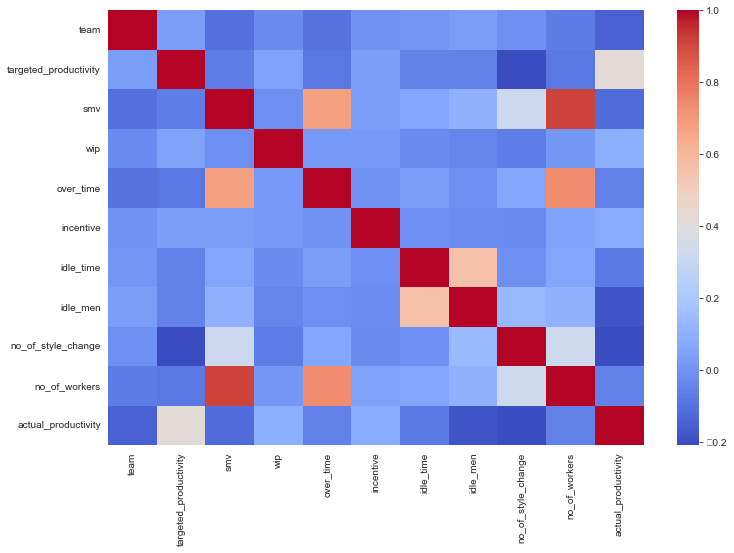

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap="coolwarm")

Highest Positive Correlations:

* No_of workers and smv (0.91)
* No_of workers and over_time (0.73)
* Over_time and smv (0.67)
* Idle_men and Idle_time (0.56)
* Positive Correlations:

* No_of workers and no_of_style_change(0.33)
* No_of_style_changehas and smv (0.32)
* There isnt any obvious negative correlation between features

<a id='5'></a>
# <p style="background-color:violet; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Data Visualization</p>

## Team :Associated team number with the instance

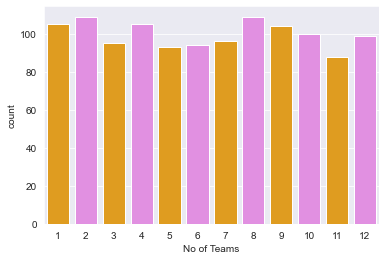

In [16]:
ax = sns.countplot(x = 'team', data = data, palette=["orange", "violet"])
plt.xlabel('No of Teams')
plt.show()

There are 12 teams. Because It is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories, my analsys will be on team basis.

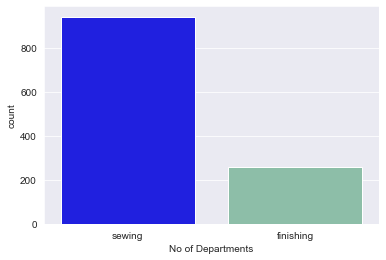

In [17]:
ax = sns.countplot(x = 'department', data = data, palette=["blue", "#85c6a9"])
plt.xlabel('No of Departments')
plt.show()

There are 3 department namely sweing, finishing and finishing but we need to collect them into two group

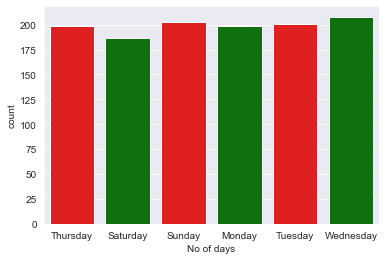

In [18]:
ax = sns.countplot(x = 'day', data = data, palette=["red", "green"])
plt.xlabel('No of days')
plt.show()

Friday is not a working day

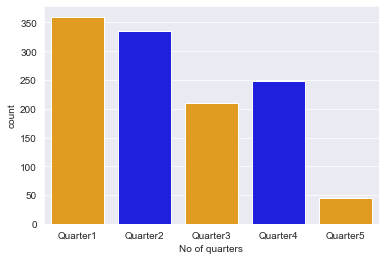

In [19]:
ax = sns.countplot(x = 'quarter', data = data, palette=["orange", "blue"])
plt.xlabel('No of quarters')
plt.show()

There are 5 quarter as quarter 1, quarter 2, quarter 3, quarter 4, quarter 5, which are not evenly distributed

#### Numeric Features

In [20]:
data.select_dtypes(include=np.number).columns.tolist()

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In this case we have 11 numeric feature as given above but no_of_style_change will be handled as a categorical feature

### SMV : Standard Minute Value, it is the allocated time for a task

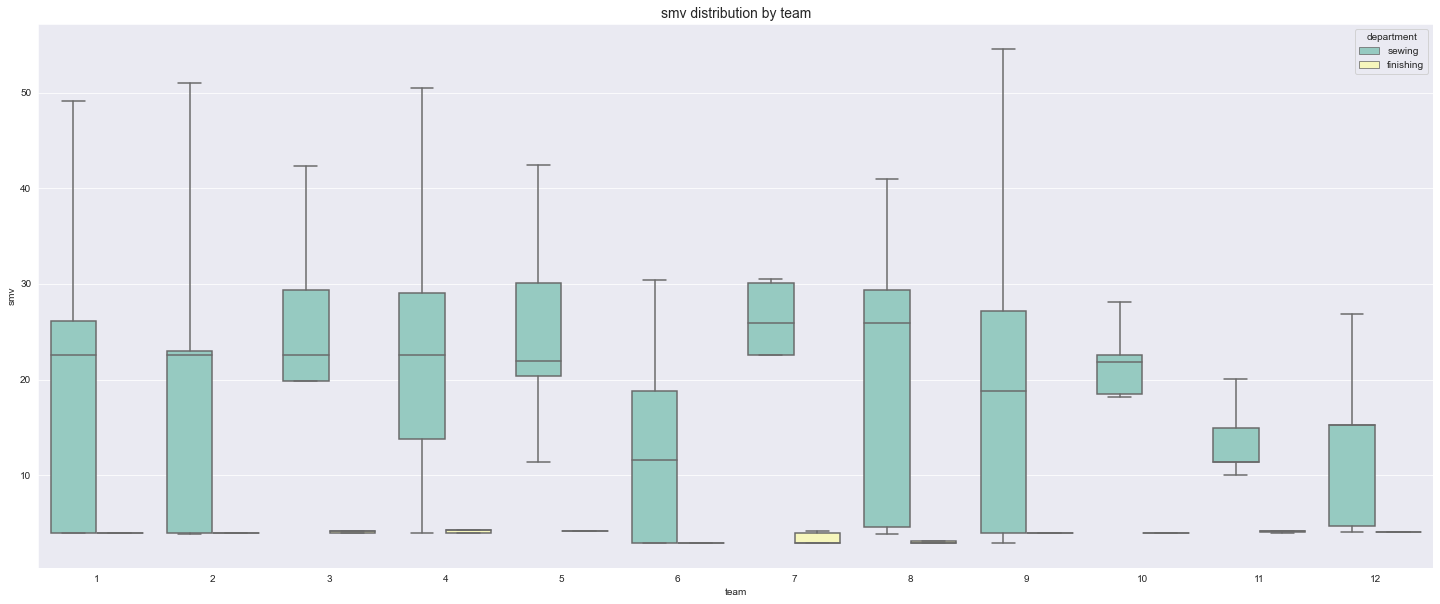

In [21]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = data,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

When we look into smv boxplot on team basis with department seperation, it can be clearly seen that while there are fluctuations between teams in the sewing department, the finishing department has almost evenly distributed smv values for each team.

<AxesSubplot:xlabel='no_of_workers', ylabel='smv'>

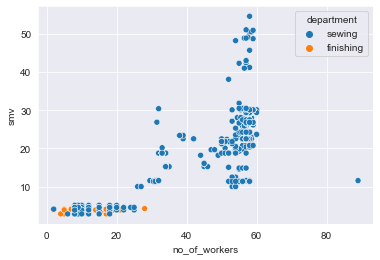

In [22]:
sns.scatterplot(data=data, x="no_of_workers", y="smv", hue="department")

For the finising department smv doees not change with no_of_workers

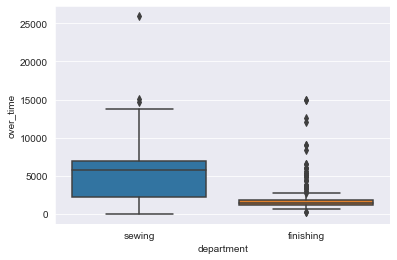

In [23]:
sns.boxplot(x='department',y='over_time',data=data)
plt.show()

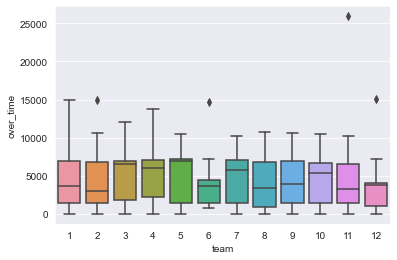

In [24]:
sns.boxplot(x='team',y='over_time',data=data)
plt.show()

In [25]:
data[data['over_time']>12000].shape

(8, 15)

In [26]:
data[data['over_time']>12000]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
36,2015-01-03,Quarter1,sewing,Saturday,4,0.70,23.69,544.0,13800,0,0.0,0,0,60.0,0.700134
127,2015-01-08,Quarter2,finishing,Thursday,4,0.80,3.94,1190.0,12600,0,0.0,0,0,20.0,0.919905
138,2015-01-08,Quarter2,sewing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31.5,0.800107
139,2015-01-08,Quarter2,sewing,Thursday,6,0.80,11.41,411.0,14640,50,0.0,0,0,30.5,0.800025
146,2015-01-08,Quarter2,sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951
377,2015-01-22,Quarter4,sewing,Thursday,1,0.70,22.94,1384.0,12180,63,0.0,0,0,57.0,0.750162
383,2015-01-22,Quarter4,finishing,Thursday,1,0.70,3.94,1190.0,15000,0,0.0,0,0,25.0,0.649662
384,2015-01-22,Quarter4,finishing,Thursday,2,0.70,3.94,1190.0,15000,0,0.0,0,0,25.0,0.649662


In [27]:
data[data['incentive']>150].shape

(10, 15)

In [28]:
data[data['incentive']>150]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1128,2015-03-09,Quarter2,sewing,Monday,11,0.80,2.90,1190.0,0,960,0.0,0,0,8.0,0.960625
1129,2015-03-09,Quarter2,sewing,Monday,12,0.80,4.60,1190.0,0,1080,0.0,0,0,9.0,0.902963
1130,2015-03-09,Quarter2,sewing,Monday,5,0.60,3.94,1190.0,0,2880,0.0,0,0,12.0,0.864343
1133,2015-03-09,Quarter2,sewing,Monday,9,0.75,2.90,1190.0,0,3600,0.0,0,0,15.0,0.841000
1137,2015-03-09,Quarter2,sewing,Monday,3,0.80,4.60,1190.0,0,1440,0.0,0,0,12.0,0.795417
1138,2015-03-09,Quarter2,sewing,Monday,4,0.75,3.94,1190.0,0,960,0.0,0,0,8.0,0.795388
1139,2015-03-09,Quarter2,sewing,Monday,1,0.75,3.94,1190.0,0,960,0.0,0,0,8.0,0.794567
1143,2015-03-09,Quarter2,sewing,Monday,2,0.70,3.90,1190.0,0,1200,0.0,0,0,10.0,0.682500
1148,2015-03-09,Quarter2,sewing,Monday,10,0.70,2.90,1190.0,0,960,0.0,0,0,8.0,0.477292
1149,2015-03-09,Quarter2,sewing,Monday,8,0.65,3.90,1190.0,0,960,0.0,0,0,8.0,0.264062


All of the highest incentive values belong to the finishing department on March 9, Quarter2.

In [29]:
data[data['idle_time']>20]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2015-02-04,Quarter1,sewing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2015-02-04,Quarter1,sewing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2015-02-07,Quarter1,sewing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2015-02-07,Quarter1,sewing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319


All of the highest idle_men values belong to the sweing department on February 4 and 7, Quarter1.

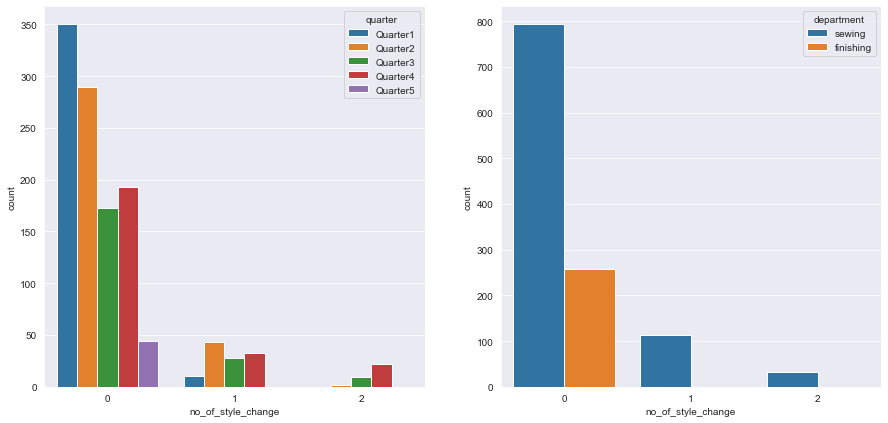

In [30]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 2, 1)
sns.countplot('no_of_style_change',hue='quarter',data=data)
plt.xlabel('no_of_style_change')

plt.subplot(1, 2, 2)
sns.countplot('no_of_style_change',hue='department',data=data)
plt.xlabel('no_of_style_change')

plt.show()

There is no no_of_style_change in Quarter5 and all of changes occured in the sweing department

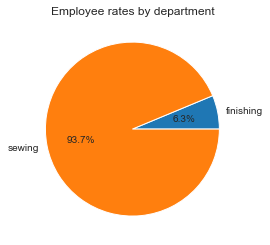

In [31]:
df = data.groupby(['department']).no_of_workers.sum()
df.plot.pie(title="Employee rates by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

Employee rates in sweing and finishing departments are respectively %87.5 and %12.5.

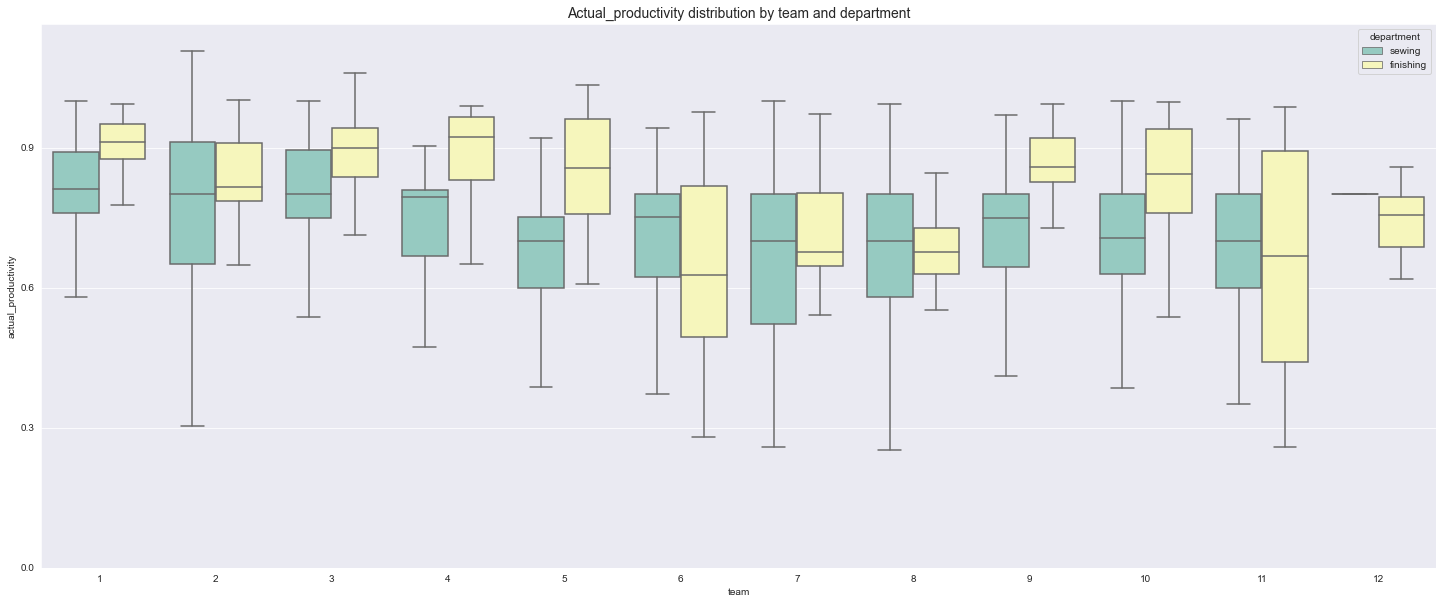

In [32]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'actual_productivity', data = data,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize= 14)
plt.show()

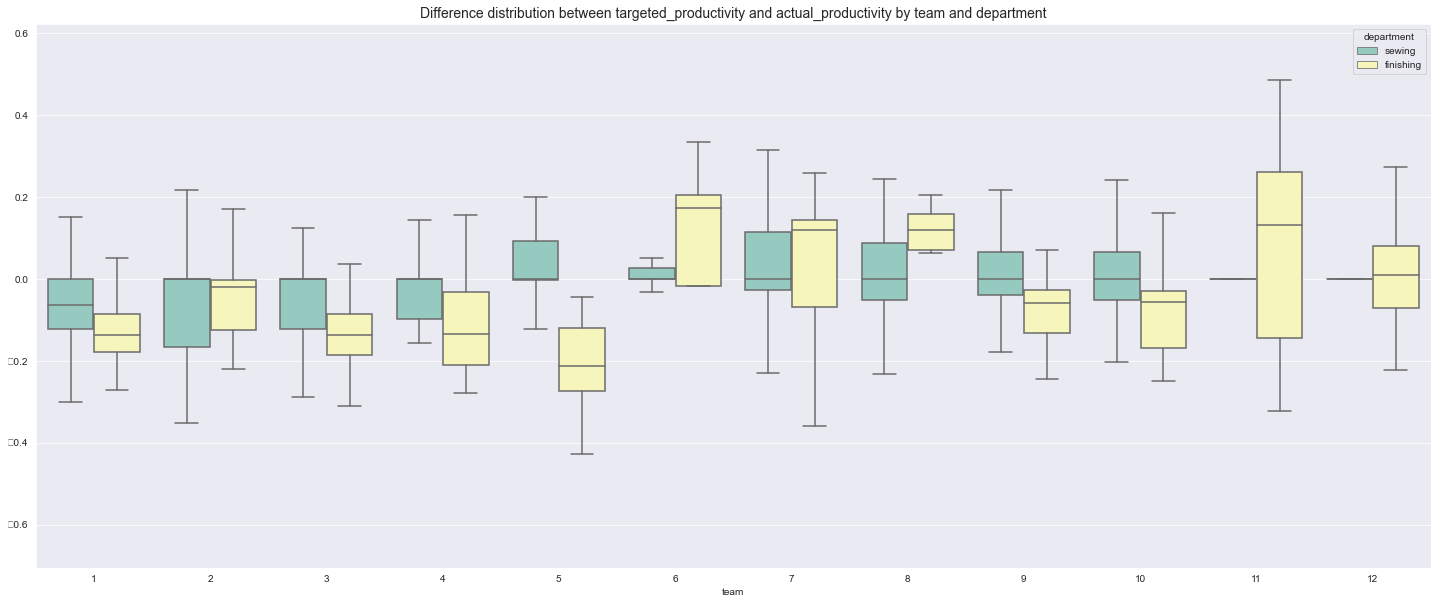

In [33]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = data.targeted_productivity-data.actual_productivity, data = data,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

In [34]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [35]:
# split features into Categorical and Numerical 
catogrical = [x for x in data.columns if data[x].dtype == "object"]
numeric = [x for x in data.columns if data[x].dtype == "float64"]
#filling null or missing values with more frequent values
for i in catogrical:
    data[i].fillna(data[i].mode()[0], inplace=True)
# filling null or missing values with mean or average 

for i in numeric:
    data[i].fillna(data[i].mean(), inplace = True)

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'team'}>,
        <AxesSubplot:title={'center':'targeted_productivity'}>],
       [<AxesSubplot:title={'center':'smv'}>,
        <AxesSubplot:title={'center':'wip'}>,
        <AxesSubplot:title={'center':'over_time'}>],
       [<AxesSubplot:title={'center':'incentive'}>,
        <AxesSubplot:title={'center':'idle_time'}>,
        <AxesSubplot:title={'center':'idle_men'}>],
       [<AxesSubplot:title={'center':'no_of_style_change'}>,
        <AxesSubplot:title={'center':'no_of_workers'}>,
        <AxesSubplot:title={'center':'actual_productivity'}>]],
      dtype=object)

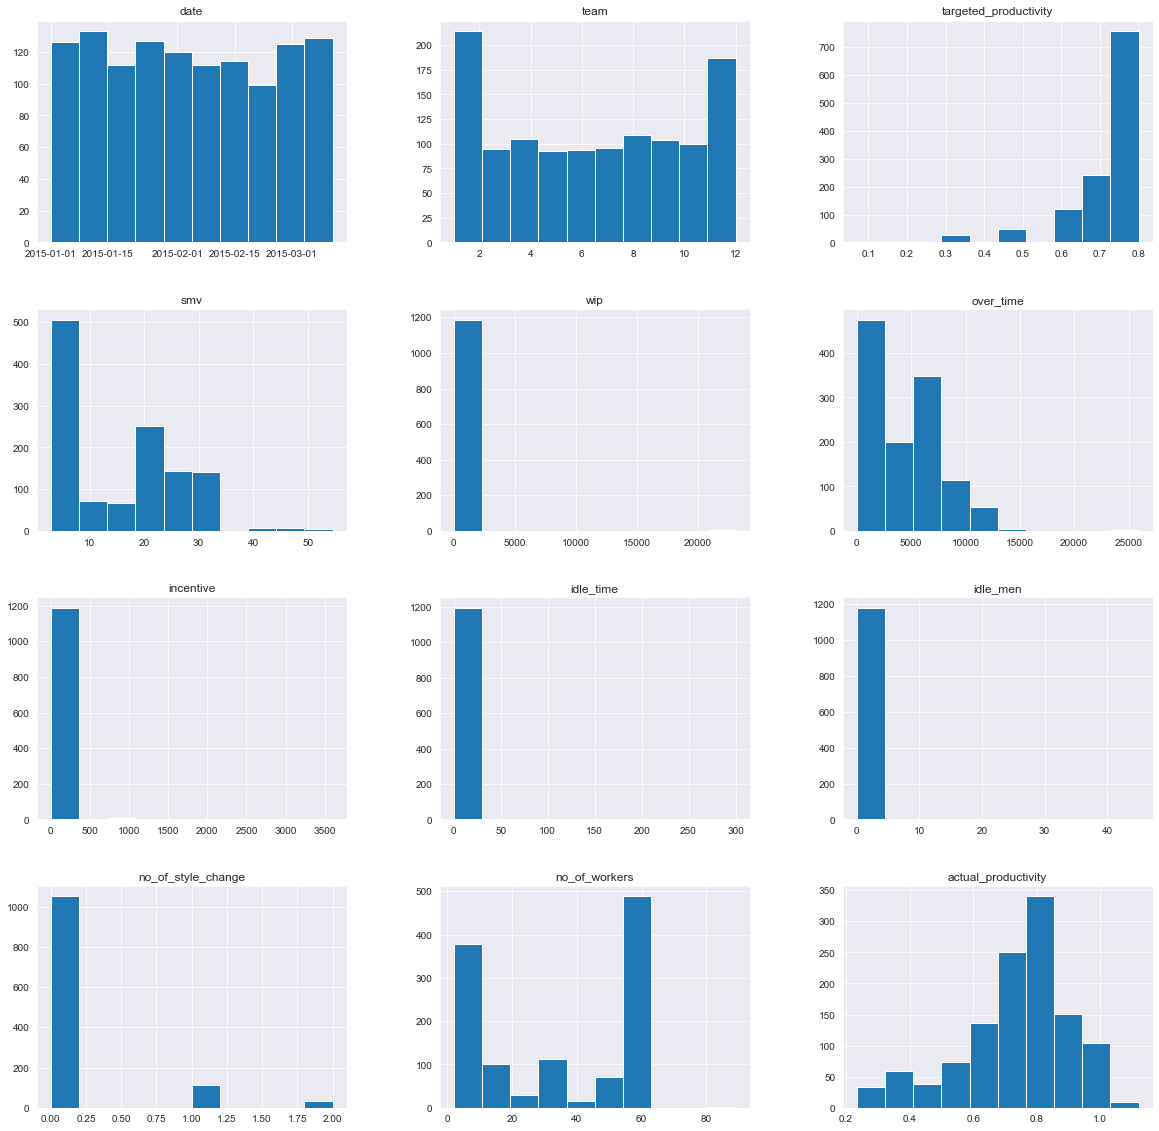

In [36]:
# see how the data is distributed.
data.hist(figsize = (20,20))

## Creating Target_Label for productivity

In [37]:
data1=data.copy()

In [38]:
data1['diff']=data1.actual_productivity-data1.targeted_productivity
data1.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'diff'],
      dtype='object')

In [39]:
data1['Target_label']=np.nan
data1.head()
data1.loc[data1['diff']<0,'Target_label'] = -1
data1.loc[(data1['diff']==0), 'Target_label'] = 0
data1.loc[data1['diff']>0, 'Target_label'] = 1
data1.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,diff,Target_label
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725,1.0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,0.136500,1.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1.0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570,1.0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382,1.0


### Observations
If the difference between actual_productivity and targeted_productivity is positive it means productivity is in the range of over_performed,

If the difference between actual_productivity and targeted_productivity is equal to 0 it meansproductivity is in the range of as expected,

If the difference between actual_productivity and targeted_productivity is negative it means productivity is in the range of under_performed

In [40]:
data1[data1['Target_label']==0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,diff,Target_label
163,2015-01-10,Quarter2,sewing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8,0.0,0.0
182,2015-01-11,Quarter2,sewing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8,0.0,0.0
183,2015-01-11,Quarter2,sewing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8,0.0,0.0
207,2015-01-12,Quarter2,sewing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8,0.0,0.0
229,2015-01-13,Quarter2,sewing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8,0.0,0.0
855,2015-02-19,Quarter3,sewing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7,0.0,0.0


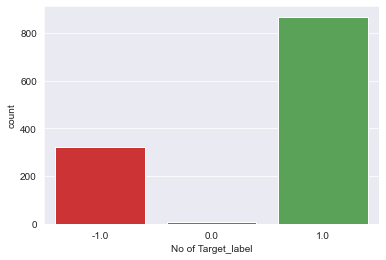

In [41]:
ax = sns.countplot(x = 'Target_label', data = data1, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

As it can be seen from the graph above, there is imbalance so it is needed to be handled

In [42]:
data1['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

### Observations
From the value counts above, it can be seen that the dataset ist imbalanced due to the large number of unbalanced observations. In this case, a binary classification problem can be modelled that predicts whether productivity is in the range of over_performed or not.

As part of our preprocessing,it is needed to turn the 3 class labels into 2 labels:

In [43]:
data1['Target_label'] = [-1 if x==-1 else 1 for x in data1['Target_label']]
data1['Target_label'].value_counts()

 1    875
-1    322
Name: Target_label, dtype: int64

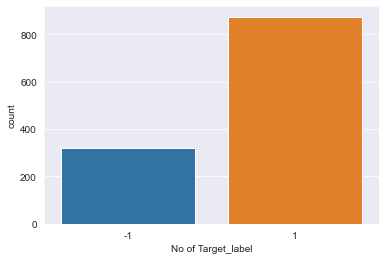

In [44]:
ax = sns.countplot(x = 'Target_label', data = data1)
plt.xlabel('No of Target_label')

plt.show()

In [45]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data1.drop(['Target_label'], axis = 1), 
                                                    data1['Target_label'], test_size = 0.2)

In [46]:
from sklearn.utils import resample,shuffle
df_majority = data1[data1['Target_label']==1]
df_minority = data1[data1['Target_label']==-1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y1_train.value_counts()[1],random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Target_label.value_counts()

 1    875
-1    706
Name: Target_label, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

data1= data.copy()
label_encoder = LabelEncoder()
for col in catogrical:
    data[col] = label_encoder.fit_transform(data[col])
    
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,0,0,3,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,1,1,5,10,0.75,2.90,1190.0,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,1,1,5,8,0.70,3.90,1190.0,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,1,1,5,7,0.65,3.90,1190.0,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,1,1,5,9,0.75,2.90,1190.0,1800,0,0.0,0,0,15.0,0.505889


In [48]:
catogrical

['quarter', 'department', 'day']

In [49]:
data["Date"] = pd.to_datetime(data['date'])
data["year"] = data["date"].dt.year
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month

# Drop original columns Date
data.drop('Date', axis=1, inplace=True)

In [50]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month
0,2015-01-01,0,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1
1,2015-01-01,0,0,1,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,2015,1
2,2015-01-01,0,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1
3,2015-01-01,0,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1
4,2015-01-01,0,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1


In [51]:
data.drop('date',axis=1,inplace=True)

In [52]:
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month
0,0,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1
1,0,0,1,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,2015,1
2,0,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1
3,0,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1
4,0,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1


<a id='6'></a>
# <p style="background-color:violet; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Machine Learning Model</p>

In [53]:
X = data.drop('actual_productivity',axis=1)
y = data['actual_productivity']
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

<a id='6.1'></a>
# <p style="background-color:orange; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Applying Regression Algorithms</p>

## Linear Regression

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [55]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))


R2 score is -1.7952746468717762
Residual sum of squares (MSE): 0.02


In [58]:
lr.score(X_test,y_test)

0.18850806288949817

In [59]:
from scipy.stats import spearmanr, pearsonr
predicted_train = lr.predict(X_train)
predicted_test = lr.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test data R-2 score: ',test_score)
print('Test data Spearman correlation',spearman[0])
print('Test data Pearson correlation',pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:',train_score)
print('Train data Spearman correlation',spearmanTrain[0])
print('Train data Pearson correlation:',pearsonTrain[0])


Test data R-2 score:  0.18850806288949817
Test data Spearman correlation 0.5087623078089165
Test data Pearson correlation 0.4443476943392052
 
Train data R-2 score: 0.3219553076244671
Train data Spearman correlation 0.5503116253845799
Train data Pearson correlation: 0.567411057016399


## Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(X_train,y_train)
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test data R-2 score: ',test_score)
print('Test data Spearman correlation',spearman[0])
print('Test data Pearson correlation',pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score:',train_score)
print('Train data Spearman correlation',spearmanTrain[0])
print('Train data Pearson correlation:',pearsonTrain[0])

Test data R-2 score:  0.49391256996173505
Test data Spearman correlation 0.7186787970591568
Test data Pearson correlation 0.7039641333558366
 
Train data R-2 score: 0.7951195826233187
Train data Spearman correlation 0.9015816774381229
Train data Pearson correlation: 0.9008574194556593


<a id='6.2'></a>
# <p style="background-color:yellow; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 10px 25px;">Applying Classification Algorithms</p>

In [61]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [62]:
balanced_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,diff,Target_label
106,2015-01-07,Quarter1,sewing,Wednesday,1,0.80,26.16,1179.0,10620,75,0.0,0,0,59.0,0.850502,0.050502,1
874,2015-02-22,Quarter4,sewing,Sunday,8,0.70,29.40,1146.0,6840,40,0.0,0,2,57.0,0.700614,0.000614,1
969,2015-02-28,Quarter4,sewing,Saturday,1,0.50,3.94,1190.0,3360,0,0.0,0,0,8.0,0.768847,0.268847,1
160,2015-01-10,Quarter2,sewing,Saturday,12,0.80,11.61,893.0,4710,50,0.0,0,0,31.5,0.800346,0.000346,1
413,2015-01-24,Quarter4,finishing,Saturday,1,0.70,3.94,1190.0,1440,0,0.0,0,0,8.0,0.578314,-0.121686,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2015-02-25,Quarter4,sewing,Wednesday,7,0.75,4.60,1190.0,960,0,0.0,0,0,8.0,0.676667,-0.073333,-1
1017,2015-03-02,Quarter1,sewing,Monday,9,0.75,18.79,935.0,6240,45,0.0,0,0,52.0,0.750396,0.000396,1
289,2015-01-17,Quarter3,sewing,Saturday,2,0.60,22.94,865.0,6570,23,0.0,0,0,56.5,0.770114,0.170114,1
923,2015-02-25,Quarter4,sewing,Wednesday,5,0.80,4.60,1190.0,1080,0,0.0,0,0,9.0,0.902963,0.102963,1


In [63]:
from sklearn.preprocessing import LabelEncoder

data3= balanced_df.copy()
label_encoder = LabelEncoder()
for col in catogrical:
    balanced_df[col] = label_encoder.fit_transform(balanced_df[col])
    
balanced_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,diff,Target_label
106,2015-01-07,0,1,5,1,0.80,26.16,1179.0,10620,75,0.0,0,0,59.0,0.850502,0.050502,1
874,2015-02-22,3,1,2,8,0.70,29.40,1146.0,6840,40,0.0,0,2,57.0,0.700614,0.000614,1
969,2015-02-28,3,1,1,1,0.50,3.94,1190.0,3360,0,0.0,0,0,8.0,0.768847,0.268847,1
160,2015-01-10,1,1,1,12,0.80,11.61,893.0,4710,50,0.0,0,0,31.5,0.800346,0.000346,1
413,2015-01-24,3,0,1,1,0.70,3.94,1190.0,1440,0,0.0,0,0,8.0,0.578314,-0.121686,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2015-02-25,3,1,5,7,0.75,4.60,1190.0,960,0,0.0,0,0,8.0,0.676667,-0.073333,-1
1017,2015-03-02,0,1,0,9,0.75,18.79,935.0,6240,45,0.0,0,0,52.0,0.750396,0.000396,1
289,2015-01-17,2,1,1,2,0.60,22.94,865.0,6570,23,0.0,0,0,56.5,0.770114,0.170114,1
923,2015-02-25,3,1,5,5,0.80,4.60,1190.0,1080,0,0.0,0,0,9.0,0.902963,0.102963,1


In [64]:
balanced_df["Date"] = pd.to_datetime(balanced_df['date'])
balanced_df["year"] = balanced_df["date"].dt.year
balanced_df["day"] = balanced_df["date"].dt.day
balanced_df["month"] = balanced_df["date"].dt.month

# Drop original columns Date
balanced_df.drop('date', axis=1, inplace=True)
balanced_df.drop('Date', axis=1, inplace=True)


In [65]:
X = balanced_df.drop('Target_label',axis=1)
y = balanced_df['Target_label']
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

## Random Forest Classifier

In [66]:
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[522   0]
 [  0 663]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              -1      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    522.0  663.0       1.0     1185.0        1185.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[184   0]
 [  0 212]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              -1      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    184.0  212.0       1.0      396.0         396.0


In [67]:
scores= {'Name':'Random Forest',
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

## Decision Tree Classifier

In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[522   0]
 [  0 663]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              -1      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    522.0  663.0       1.0     1185.0        1185.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[184   0]
 [  0 212]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              -1      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    184.0  212.0       1.0      396.0         396.0
